<a href="https://colab.research.google.com/github/JonathanJulDiaz/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [35]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [36]:
import matplotlib.pyplot as plt

# Creamos una lista donde guardaremos cada grafica
graficas : list = []

# Creamos un data frame donde guardaremos los datos a analizar de cada tienda
tabla_tiendas = pd.DataFrame(index = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

# Creamos una lista de tuplas para asignarle un color a cada tienda al graficar
colores_tienda : dict[str, str] = dict(zip(tabla_tiendas.index, ['green', 'red', 'blue', 'orange']))

tabla_tiendas

""
Tienda 1
Tienda 2
Tienda 3
Tienda 4


#1. Análisis de facturación



In [37]:
# Agregamos los ingresos de cada tienda a nuestro data frame para mayor organización
tabla_tiendas['Ingreso total'] : list = list(map(lambda x: x['Precio'].sum(), [tienda, tienda2, tienda3, tienda4]))

tabla_tiendas

,Ingreso total
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


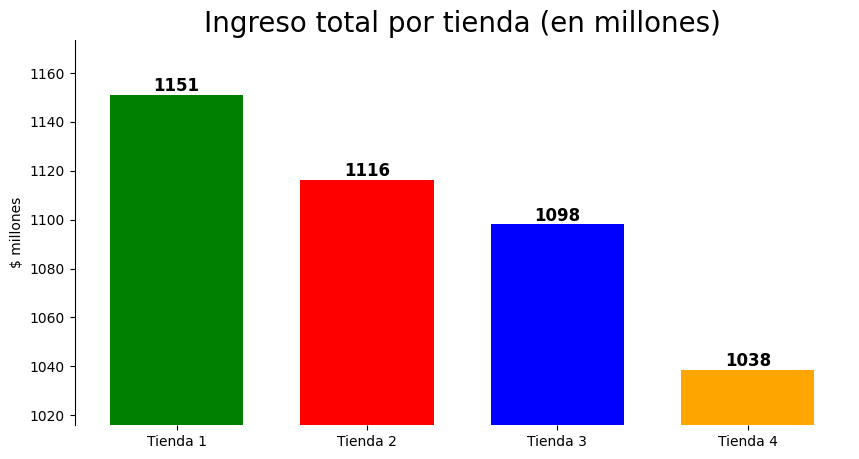

In [38]:
# Creamos una figura nueva para el grafico de los ingresos
fig1, ax1 = plt.subplots(figsize = (10, 5))

# Le ponemos un titulo al grafico y al eje y
ax1.set_title('Ingreso total por tienda (en millones)', fontsize= 20)
ax1.set_ylabel('$ millones')

# Para mayor legibilidad, dado que los ingresos llegan a mil millones, vamos a dividir
# los ingresos por un millon, asociado con cada tienda en una tupla
ingreso_por_tienda : list[tuple[str, float]] = list(zip(tabla_tiendas.index, list(map(lambda ingresos: ingresos / 1000000, tabla_tiendas['Ingreso total']))))

# Organizamos los ingresos de mayor a menor para mayor legibilidad del grafico
ingreso_por_tienda.sort(key = lambda ingreso: ingreso[1], reverse = True)

# Seleccionamos un grafico de barras, como el grafico que mostraremos
bars = ax1.bar(x = list(map(lambda x : x[0], ingreso_por_tienda)),
              width= 0.7,
              height = list(map(lambda x: x[1], ingreso_por_tienda)),
              color = [colores_tienda[tienda_nombre] for tienda_nombre in list(map(lambda x : x[0], ingreso_por_tienda))]
              )

# Le añadimos el valor de los ingresos arriba de cada barra
ax1.bar_label(bars, fontsize = 12, fontweight = 'bold', fmt = '%.f')

# Ajustamos el limite del eje y entre 900 y 1200 millones para
# apreciar más facilmente la diferencia entre las barras
ax1.set_ylim(ingreso_por_tienda[-1][1] - (ingreso_por_tienda[0][1] - ingreso_por_tienda[-1][1])*0.2, ingreso_por_tienda[0][1] + (ingreso_por_tienda[0][1] - ingreso_por_tienda[-1][1])*0.2)

# Quitamos las lineas limitantes arriba y a la derecha para menor ruido
# visual
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Mostramos el grafico
fig1.show()

# Y lo guardamos para mostrarlo junto con los proximos graficos
graficas.append(fig1)

## Analisis de ingresos:
Despues de sumar los ingresos de cada tienda, y compararlos entre si, notamos que la **Tienda 4** es la que ha generado menos ingresos (1,038 millones) comparado con las otras 3 tiendas.

# 2. Ventas por categoría

In [39]:
# Agregamos a nuestro data frame las ventas por categoria de cada tienda
ventas_categorias_tienda1 : list[tuple[str,int]] = list(zip(list(tienda['Categoría del Producto'].value_counts().index), list(map(lambda x : int(x), list(tienda['Categoría del Producto'].value_counts().values)))))
ventas_categorias_tienda2 : list[tuple[str,int]] = list(zip(list(tienda2['Categoría del Producto'].value_counts().index), list(map(lambda x : int(x), list(tienda2['Categoría del Producto'].value_counts().values)))))
ventas_categorias_tienda3 : list[tuple[str,int]] = list(zip(list(tienda3['Categoría del Producto'].value_counts().index), list(map(lambda x : int(x), list(tienda3['Categoría del Producto'].value_counts().values)))))
ventas_categorias_tienda4 : list[tuple[str,int]] = list(zip(list(tienda4['Categoría del Producto'].value_counts().index), list(map(lambda x : int(x), list(tienda4['Categoría del Producto'].value_counts().values)))))

tabla_tiendas['Ventas por categoría'] : list = [ventas_categorias_tienda1, ventas_categorias_tienda2, ventas_categorias_tienda3, ventas_categorias_tienda4]
tabla_tiendas

,Ingreso total,Ventas por categoría
Tienda 1,1.150880e+09,"[(Muebles, 465), (Electrónicos, 448), (Juguete..."
Tienda 2,1.116344e+09,"[(Muebles, 442), (Electrónicos, 422), (Juguete..."
Tienda 3,1.098020e+09,"[(Muebles, 499), (Electrónicos, 451), (Juguete..."
Tienda 4,1.038376e+09,"[(Muebles, 480), (Electrónicos, 451), (Juguete..."


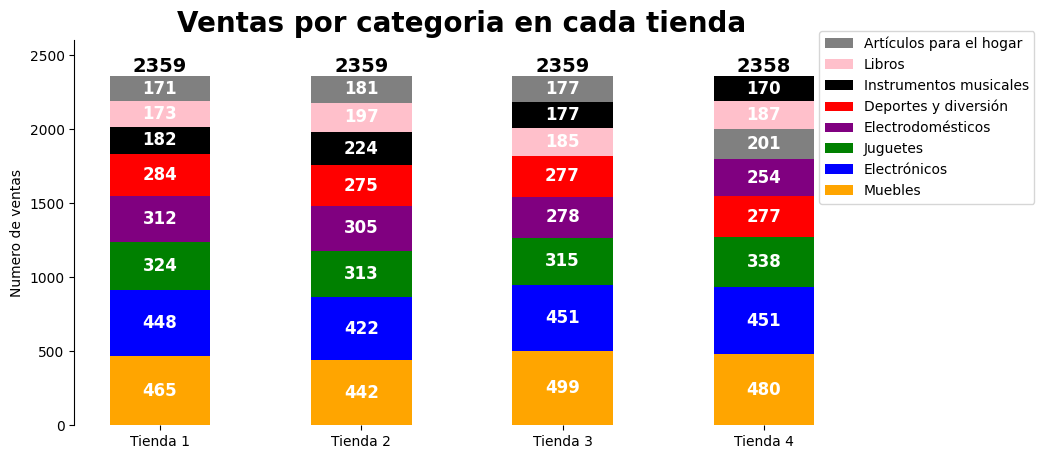

In [40]:
# Creamos una figura nueva
fig2, ax2 = plt.subplots(figsize = (10, 5))

# Le ponemos un titulo al grafico y al eje y
ax2.set_title('Ventas por categoria en cada tienda', fontsize= 20, fontweight = 'bold')
ax2.set_ylabel('Numero de ventas')

# Creamos una lista de colores para cada categoria al momento de graficar
colores : list[str] = ['orange', 'blue', 'green', 'purple', 'red', 'black', 'pink', 'gray']

# Obtenemos los nombres de las categorias
categorias_nombre : list = list(tabla_tiendas['Ventas por categoría'].value_counts().index[0])

categoria_colores : dict[str, str] = {}

# Asignamos un color a cada categoria
for categoria, color in zip(categorias_nombre, colores):
  categoria_colores[categoria[0]] : str = color

# Creamos un set que contendra la leyenda de cada categoria en el grafico
leyenda : set[str] = set()

# Recorremos cada tienda
for nombre_tienda in tabla_tiendas['Ventas por categoría'].index:
  # Cantidad de ventas en cada categoria
  acumulacion_ventas : int = 0

  # Recorremos las categorias y ventas por categoria segun cada tienda
  for categoria in tabla_tiendas['Ventas por categoría'][nombre_tienda]:
    # Si ya tenemos esta categoria en la leyenda, no la volvemos a agregar
    if leyenda.issuperset(set([categoria[0]])):
      stacked_bar = ax2.bar(nombre_tienda, categoria[1],  width= 0.5, bottom = acumulacion_ventas, color = categoria_colores[categoria[0]])
    # En caso contrario agregamos la categoria a la leyenda
    else:
      stacked_bar = ax2.bar(nombre_tienda, categoria[1], label = categoria[0],  width= 0.5, bottom = acumulacion_ventas, color = categoria_colores[categoria[0]])
      leyenda.add(categoria[0])

    # Le ponemos una etiqueta con la cantidad de ventas de esa categoria
    ax2.bar_label(stacked_bar, label_type = 'center', fontweight = 'bold', fontsize = 12, color = 'white')

    # Sumamos la cantidad de ventas de esta categoria
    acumulacion_ventas += categoria[1]

  # Al final de recorrer las categorias de un tienda, le ponemos una etiqueta de la
  # cantidad total de ventas que tuvo dicha tienda
  ax2.bar_label(stacked_bar, label_type = 'edge', fontweight = 'bold', fontsize = 14, color = 'black')

# Invertimos el orden de la leyenda para mejor legibilidad
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[::-1], labels[::-1], loc = 'center', bbox_to_anchor=(1.1, 0.8), fontsize = 10)

# Ajustamos el limite del eje y para tener más espacio
ax2.set_ylim(0, 2600)

# Quitamos las lineas limitantes arriba y a la derecha para menor ruido
# visual
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Mostramos el grafico
fig2.show()

# Y lo guardamos para mostrarlo junto con los proximos graficos
graficas.append(fig2)

## Analisis de ventas por categoria:
En la grafica podemos notar que las 3 principales categorias que llegan a tener mayor cantidad de venta en las 4 tiendas, siempre son: **Muebles**, **Electronicos** y **Juguetes**, en ese orden.

# 3. Calificación promedio de la tienda


In [41]:
# Sacamos el promedio del total de calificaciones de cada tienda
calificacion_tienda1 : float = sum(tienda['Calificación']) / len(tienda['Calificación'])
calificacion_tienda2 : float = sum(tienda2['Calificación']) / len(tienda2['Calificación'])
calificacion_tienda3 : float = sum(tienda3['Calificación']) / len(tienda3['Calificación'])
calificacion_tienda4 : float = sum(tienda4['Calificación']) / len(tienda4['Calificación'])

# Y las agregamos a nuestro data frame
tabla_tiendas['Calificación'] : list = [calificacion_tienda1,
                                        calificacion_tienda2,
                                        calificacion_tienda3,
                                        calificacion_tienda4]

tabla_tiendas

,Ingreso total,Ventas por categoría,Calificación
Tienda 1,1.150880e+09,"[(Muebles, 465), (Electrónicos, 448), (Juguete...",3.976685
Tienda 2,1.116344e+09,"[(Muebles, 442), (Electrónicos, 422), (Juguete...",4.037304
Tienda 3,1.098020e+09,"[(Muebles, 499), (Electrónicos, 451), (Juguete...",4.048326
Tienda 4,1.038376e+09,"[(Muebles, 480), (Electrónicos, 451), (Juguete...",3.995759


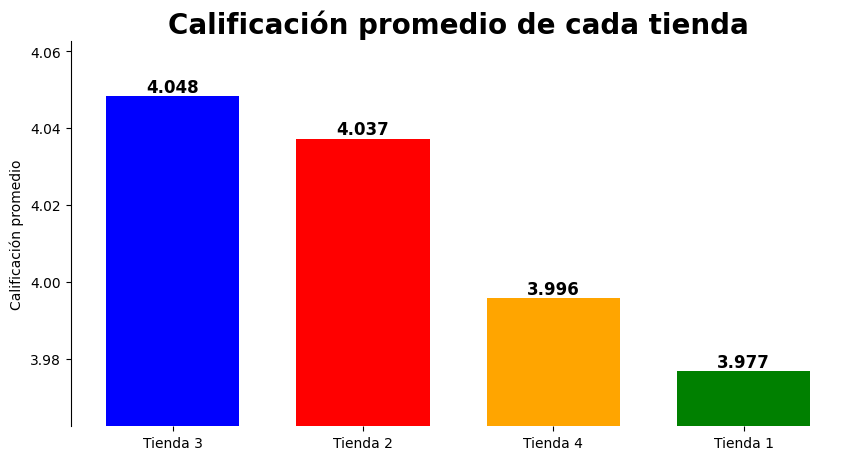

In [42]:
# Creamos una nueva figura
fig3, ax3 = plt.subplots(figsize = (10, 5))

# Le ponemos un titulo al grafico y al eje y
ax3.set_title('Calificación promedio de cada tienda', fontsize= 20, fontweight = 'bold')
ax3.set_ylabel('Calificación promedio')

# Obtenemos las calificaciones de cada tiempo en una lista de tuplas
calificaciones : list[tuple[str, float]] = list(zip(tabla_tiendas.index, tabla_tiendas['Calificación']))

# La organizamos de mayor a menor
calificaciones.sort(key = lambda x: x[1], reverse = True)

# Seleccionamos un grafico de barras, como el grafico que mostraremos
bar_calificacion = ax3.bar(x = list(map(lambda x: x[0], calificaciones)),
                          width= 0.7,
                          height = list(map(lambda x: x[1], calificaciones)),
                          color = [colores_tienda[nombre_tienda] for nombre_tienda in list(map(lambda x: x[0], calificaciones))])

# Le añadimos el valor de cada barra
ax3.bar_label(bar_calificacion, fontsize = 12, fontweight = 'bold', fmt = '%.3f')

# Ajustamos el limite del eje y para tener notar la diferencia entre las barra
# más facilmente
ax3.set_ylim(calificaciones[-1][1] - (calificaciones[0][1] - calificaciones[-1][1])*0.2, calificaciones[0][1] + (calificaciones[0][1] - calificaciones[-1][1])*0.2)

# Quitamos las lineas limitantes arriba, a la derecha y abajo para menor ruido
# visual
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

# Mostramos el grafico
fig3.show()

# Y lo guardamos para mostrarlo junto con los proximos graficos
graficas.append(fig3)

## Analisis de calificación de las tiendas:
Vemos en la grafica, que en promedio, los clientes se sienten más satisfechos con el servicio ofrecido con la **Tienda 3**(4.048), comparado con la **Tienda 1**(3.977), que aunque el peor promedio en calificación, la diferencia no es muy grande.

# 4. Productos más y menos vendidos

In [43]:
# Obtenemos cada producto con su número de ventas en cada tienda
ventas_productos1 : list[tuple[str, int]] = list(zip(list(tienda['Producto'].value_counts().index), list(tienda['Producto'].value_counts())))
ventas_productos2 : list[tuple[str, int]] = list(zip(list(tienda2['Producto'].value_counts().index), list(tienda2['Producto'].value_counts())))
ventas_productos3 : list[tuple[str, int]] = list(zip(list(tienda3['Producto'].value_counts().index), list(tienda3['Producto'].value_counts())))
ventas_productos4 : list[tuple[str, int]] = list(zip(list(tienda4['Producto'].value_counts().index), list(tienda4['Producto'].value_counts())))

# Los guardamos en nuestro data frame
tabla_tiendas['Ventas por producto'] : list = [ventas_productos1,
                                        ventas_productos2,
                                        ventas_productos3,
                                        ventas_productos4]

tabla_tiendas

,Ingreso total,Ventas por categoría,Calificación,Ventas por producto
Tienda 1,1.150880e+09,"[(Muebles, 465), (Electrónicos, 448), (Juguete...",3.976685,"[(Microondas, 60), (TV LED UHD 4K, 60), (Armar..."
Tienda 2,1.116344e+09,"[(Muebles, 442), (Electrónicos, 422), (Juguete...",4.037304,"[(Iniciando en programación, 65), (Microondas,..."
Tienda 3,1.098020e+09,"[(Muebles, 499), (Electrónicos, 451), (Juguete...",4.048326,"[(Kit de bancas, 57), (Mesa de comedor, 56), (..."
Tienda 4,1.038376e+09,"[(Muebles, 480), (Electrónicos, 451), (Juguete...",3.995759,"[(Cama box, 62), (Cubertería, 59), (Dashboards..."


In [44]:
import plotly.graph_objects as go

# Creamos nuestra figura inicial
fig4 = go.Figure()

# Creamos una lista que guardara cada simbolo que usaremos para representar
# los productos de cada tienda
simbolo_grafica : list = ['circle', 'circle-open', 'circle-open', 'circle-open']

# Asi como los tamaños de cada simbolo, así, si tienen dos productos
# de diferentes tiendas, el mismo valor, podremos notarlo
tamaños : list = [6, 10, 14, 18]

# Recorremos el nombre de cada tienda
for index, nombre_tienda in enumerate(list(tabla_tiendas['Ventas por producto'].index)):
  # Agregamos los productos con sus ventas de cada tienda a la figura
  fig4.add_trace(go.Scatter(
      x = list(map(lambda x: x[1], tabla_tiendas['Ventas por producto'][nombre_tienda])),
      y = list(map(lambda x: x[0], tabla_tiendas['Ventas por producto'][nombre_tienda])),
      mode = "markers",
      marker = dict(color = colores_tienda[nombre_tienda], size = tamaños[index], symbol = simbolo_grafica[index],
                    line=dict(
                        width = 2
                              )
                    ),
      name = nombre_tienda,
  ))

# Modificamos el grafico para mejor legibilidad
fig4.update_layout(
    title=dict(
        text="Ventas por producto en tiendas"
    ),
    xaxis=dict(
        title=dict(
            text="Número de ventas"
        )
    ),
    yaxis=dict(
        title=dict(
            text="Producto"
        )
    ),
    height=1000,
    paper_bgcolor='white',
    plot_bgcolor='lightgray',
    font=dict(color='black', weight='bold')
)

# Mostramos el grafico
fig4.show()

# Y lo guardamos para mostrarlo junto con los proximos graficos
graficas.append(fig4)

# Analisis de ventas por producto
## 3 Mayores productos vendidos por tienda
### Tienda 1:
- Armario (60 ventas)
- TV LED UHD 4K (60 ventas)
- Microondas (60 ventas)

### Tienda 2:
- Iniciando en programación (65 ventas)
- Microondas (62 ventas)
- Baterias (61 ventas)

### Tienda 3:
- Kit de bancas (57 ventas)
- Cama King (56 ventas)
- Mesa de comedor (56 ventas)

### Tienda 4:
- Cama box (62 ventas)
- Cubertería (59 ventas)
- Cama King (56 ventas)

# 5. Envío promedio por tienda

In [45]:
 # Sacamos el promedio del total de costos de envio por tienda
costo_envio_tienda1 : float = sum(tienda['Costo de envío']) / len(tienda['Costo de envío'])
costo_envio_tienda2 : float = sum(tienda2['Costo de envío']) / len(tienda2['Costo de envío'])
costo_envio_tienda3 : float = sum(tienda3['Costo de envío']) / len(tienda3['Costo de envío'])
costo_envio_tienda4 : float = sum(tienda4['Costo de envío']) / len(tienda4['Costo de envío'])

# Y las agregamos a nuestro data frame
tabla_tiendas['Costo de envío'] : list = [costo_envio_tienda1,
                                        costo_envio_tienda2,
                                        costo_envio_tienda3,
                                        costo_envio_tienda4]

tabla_tiendas

,Ingreso total,Ventas por categoría,Calificación,Ventas por producto,Costo de envío
Tienda 1,1.150880e+09,"[(Muebles, 465), (Electrónicos, 448), (Juguete...",3.976685,"[(Microondas, 60), (TV LED UHD 4K, 60), (Armar...",26018.609580
Tienda 2,1.116344e+09,"[(Muebles, 442), (Electrónicos, 422), (Juguete...",4.037304,"[(Iniciando en programación, 65), (Microondas,...",25216.235693
Tienda 3,1.098020e+09,"[(Muebles, 499), (Electrónicos, 451), (Juguete...",4.048326,"[(Kit de bancas, 57), (Mesa de comedor, 56), (...",24805.680373
Tienda 4,1.038376e+09,"[(Muebles, 480), (Electrónicos, 451), (Juguete...",3.995759,"[(Cama box, 62), (Cubertería, 59), (Dashboards...",23459.457167


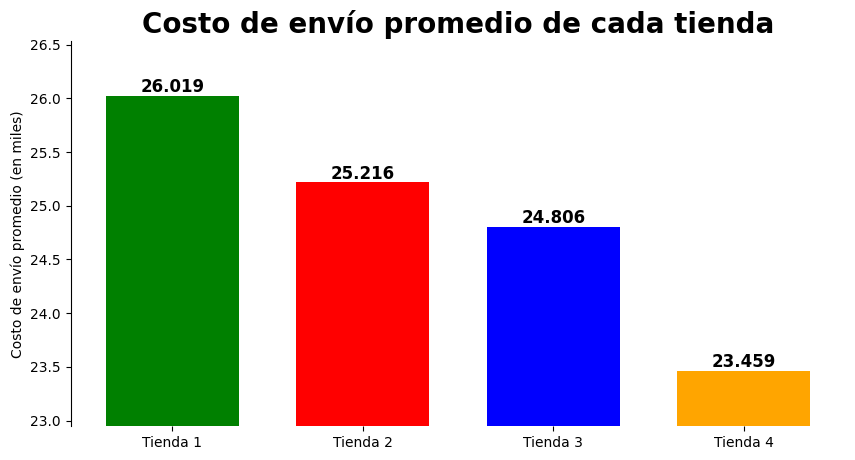

In [46]:
# Creamos una nueva figura
fig5, ax5 = plt.subplots(figsize = (10, 5))

# Le ponemos un titulo al grafico y al eje y
ax5.set_title('Costo de envío promedio de cada tienda', fontsize= 20, fontweight = 'bold')
ax5.set_ylabel('Costo de envío promedio (en miles)')

# Obtenemos las costo de envío de cada tiempo en una lista de tuplas
costo_de_envio = list(zip(tabla_tiendas.index, list(map(lambda costos: costos / 1000, tabla_tiendas['Costo de envío']))))

# La organizamos de mayor a menor
costo_de_envio.sort(key = lambda x: x[1], reverse = True)

# Seleccionamos un grafico de barras, como el grafico que mostraremos
bar_costo_envio = ax5.bar(x = list(map(lambda x: x[0], costo_de_envio)),
                          width= 0.7,
                          height = list(map(lambda x: x[1], costo_de_envio)),
                          color = [colores_tienda[nombre_tienda] for nombre_tienda in list(map(lambda x: x[0], costo_de_envio))])

# Le añadimos el valor de cada barra
ax5.bar_label(bar_costo_envio, fontsize = 12, fontweight = 'bold', fmt = '%.3f')

# Ajustamos el limite del eje y para tener notar la diferencia entre las barra
# más facilmente
ax5.set_ylim(costo_de_envio[-1][1] - (costo_de_envio[0][1] - costo_de_envio[-1][1])*0.2, costo_de_envio[0][1] + (costo_de_envio[0][1] - costo_de_envio[-1][1])*0.2)

# Quitamos las lineas limitantes arriba, a la derecha y abajo para menor ruido
# visual
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['bottom'].set_visible(False)

# Mostramos el grafico
fig5.show()

# Y lo guardamos para mostrarlo junto con los proximos graficos
graficas.append(fig5)

# Analisis de costo de envio promedio por tienda:
En la grafica, podemos ver que de las 4 tiendas, la que tiene un promedio de costo de envio más bajo es la **Tienda 4** (con 23,459).

# Graficos:

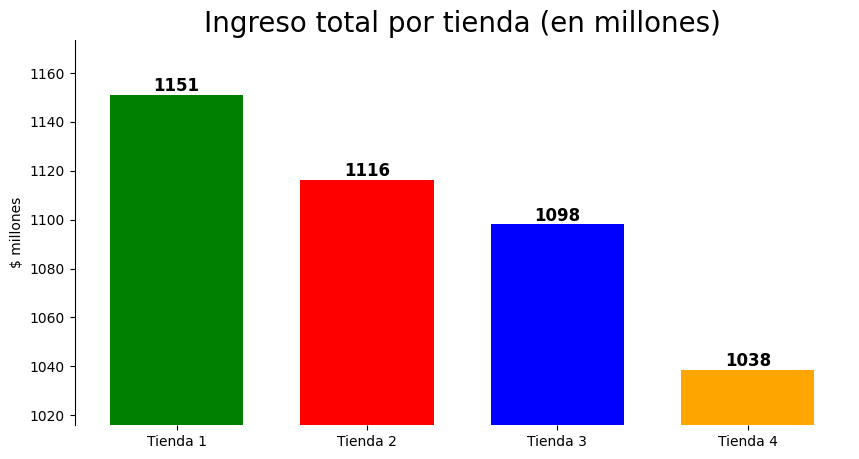

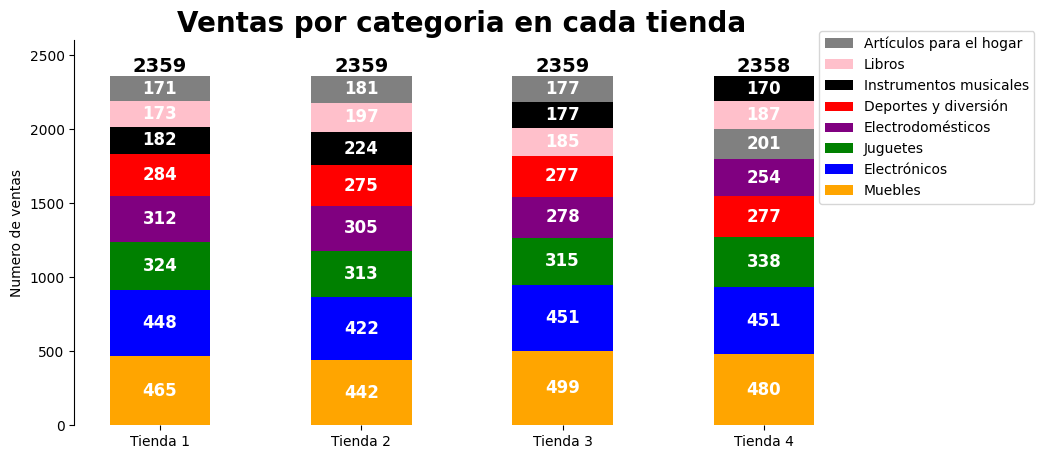

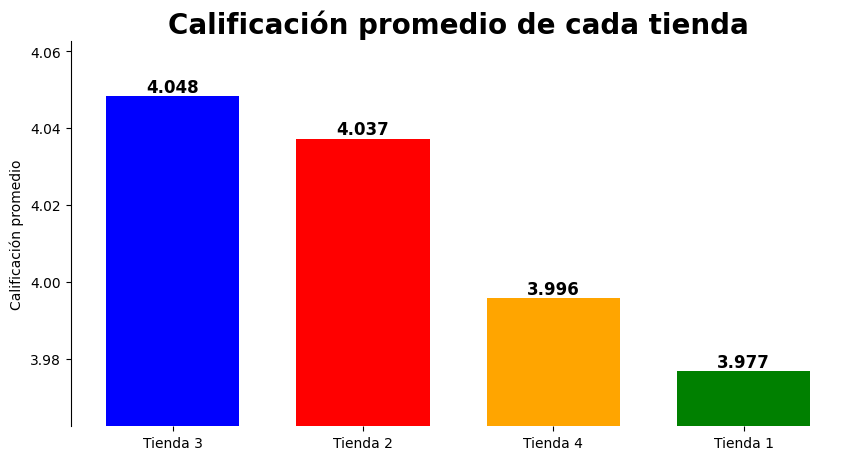

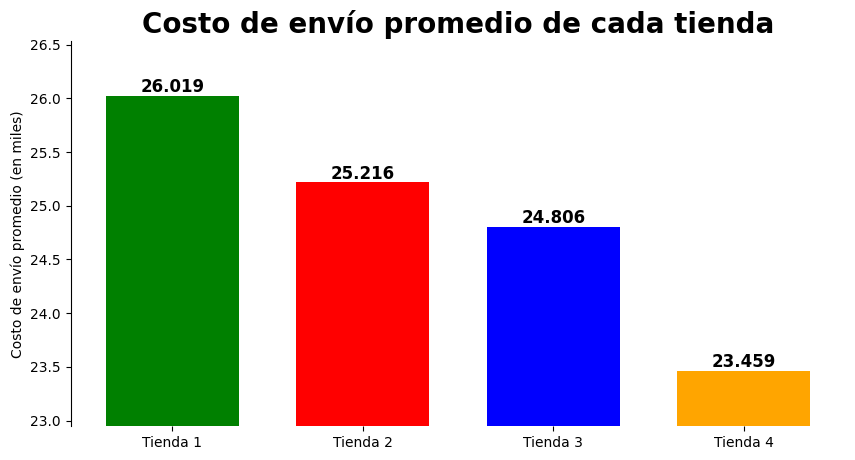

In [48]:
import IPython.display as display
# Ahora importamos esta libreria para poder mostrar de nuevo
# los graficos anteriores a la vez

for grafica in graficas:
    display.display(grafica)
    print()